## TEAM 3 - Gruppenmitglieder
* Aykan Berke Sandal - 190503012 - e190503012@stud.tau.edu.tr
* Mithat Can Turan - 1905030021 - e190503021@stud.tau.edu.tr
* Ege Çağdaş Aladağ - 190503025 - e190503025@stud.tau.edu.tr
* Melik Erdem Özen - 190503002  - e190503002@stud.tau.edu.tr

## **Datensammlung**

Sammeln Sie Daten für alle Gebrauchtwagenangebote für mindestens 5 verschiedene Hersteller Ihrer Wahl (insgesamt mindestens 30.000 Stichproben) von einem Gebrauchtwagenportal Ihrer Wahl.

Gebrauchtwageninternetportale sind z.B.:

- https://www.exchangeandmart.co.uk/
- https://www.autoscout24.de/

Das bedeutet: „scrapen“ Sie die ausgewählte Webseite (z.B. mit den Python Modulen „Requests“ und „BeautifulSoup“) und sammeln Sie dabei alle verfügbaren Informationen zu den Details der Anzeigen (Marke, Modell, Preis, Baujahr, Hubraum, Kilometerstand,…) und Spezifikationen der Fahrzeuge (Farbe, Türen, Sitze, Motorleistung, Höchstgeschwindigkeit, Beschleunigung,…). Speichern Sie die so gewonnenen Rohdaten als CSV-Dateien (eine Datei pro Hersteller) ab.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
headers = ['brand','model', 'price', 'year', 'transmission', 'fuelConsumption', 'tax', 'mileage', 'fuelType', 'color', 'variant']
df = pd.DataFrame(columns = headers)


In [2]:
# Basis-URL, die mit den Abfrageteilen für Autos und Farben zusammengeführt werden soll.
# Da "www.exchangeandmart.co.uk" nur 100 Seiten mit 10 Autos pro Seite für eine Suche anzeigt. 
# Wir erstellen dynamisch mehrere Queries, um praktisch genügend Ergebnisse zu erhalten.
url = "https://www.exchangeandmart.co.uk/used-cars-for-sale/"

# Queries, die verwendet werden
colors = ['beige', 'black', 'blue', 'bronze', 'brown', 'gold', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'turquoise', 'white', 'yellow']
cars = ['toyota', 'volvo', 'audi', 'bmw', 'citroen', 'ford', 'honda', 'hyundai', 'kia', 'nissan']

In [ ]:
for color in colors:
    for pageNumber in range(1,100):
        for car in cars:

            # Erstellung der dynamischen Query-URL
            currentUrl = url + car + "/any-distance-from-se15-1la/colour-" + color + '/page' + str(pageNumber)
            page = requests.get(currentUrl)
            soup = BeautifulSoup(page.text, 'html')

            # Suche nach allen HTML-Elementen, die Autoergebnisse enthalten
            items = soup.find_all('div', attrs={"class" : "result-item"})

            # In einigen Fällen kann eine Suchanfrage nach Farbe+Auto weniger als 100 Seiten haben.
            # Wenn eine Seite also keine Ergebnisse enthält, wird sie übersprungen. 
            if items[0].find('span', attrs={"class" : "ttl_mk"}) is None:
                break
            
            for item in items:

                # für ein beliebiges Autoergebnis den Markennamen, das Modell und den Preis ermitteln
                brand = item.find('span', attrs={"class" : "ttl_mk"}).text
                model = item.find('span', attrs={"class" : "ttl_md"}).text
                price = item.find('span', attrs={"class" : "price--primary"}).text
                variant = item.find('div', attrs={"class" : "result-item__variant"}).text
                
                # um die zusätzlichen Details des Fahrzeugs zu erhalten
                keyDetails = item.find_all('p', attrs={"class" : "key-details__item"})

                # Jedes Autoergebnis enthält normalerweise 6 Detailangaben.
                # Wenn jedoch ein Wert fehlt, wird das Auto übersprungen.
                if(len(keyDetails) < 6):
                    continue
                year = keyDetails[0].text
                transmission = keyDetails[1].text
                fuelConsumption = keyDetails[2].text
                tax = keyDetails[3].text
                mileage = keyDetails[4].text
                fueltype = keyDetails[5].text

                # Wir erstellen eine Liste für alle Attribute und fügen sie in unseren Datenrahmen ein.
                data = [brand, model, price, year, transmission, fuelConsumption, tax, mileage, fueltype, color, variant]
                df.loc[len(df)-1] = data

In [ ]:
# alle Ergebnisse in der csv-Datei speichern
df.to_csv('AllData.csv')
# die Daten nach dem Markennamen gruppieren und getrennt speichern
groupedDFs = [v for k, v in df.groupby('brand')]
for brandDF in groupedDFs:
    brandDF.to_csv(''+brandDF.brand.iloc[0]+'.csv') 

## **Datenbereinigung**

Importieren Sie den Datensatz in ein Jupyter Notebook mit Python Umgebung. Sichten Sie die Daten und führen Sie eine Datenbereinigung durch.

**1.Was beschreiben die Daten?**

Wir können die auf der Website verfügbaren Daten über Autos scrapen. um einen Datensatz zu erstellen. Zu diesen Features der Daten gehören Marke, Modell, Preis, Jahr, Getriebe, Kraftstoffverbrauch, Steuer, Kilometerstand, Kraftstoffart, Farbe und Variante.

**2.Warum sind die Daten relevant oder interessant?**

Die Relevanz oder das Interesse der Daten hängt vom Kontext der Nutzung ab. Hier sind vier mögliche Gründe, warum der zur Verfügung gestellte Datensatz über Autos als relevant oder interessant angesehen werden kann:

* **Marktanalyse:** Die Daten könnten zur Analyse des Automarktes verwendet werden, um Preistrends, beliebte Modelle und den Einfluss von Faktoren wie Kraftstoffart oder Getriebe auf die Preisgestaltung zu verstehen.
* **Entscheidungsfindung:** Personen, die Autos kaufen oder verkaufen möchten, können den Datensatz nutzen, um Entscheidungen auf der Grundlage historischer Preistrends, des Kilometerstandes und anderer Features zu treffen.
* **Politik und Besteuerung:** Für Regierungen können die Daten nützlich sein, um die Steuerpolitik in Bezug auf Autos zu bewerten, insbesondere im Hinblick auf Faktoren wie Kraftstoffverbrauch oder Emissionen.
* **Einblicke in die Automobilbranche:** Unternehmen der Automobilindustrie können die Daten nutzen, um Einblicke in die Präferenzen der Verbraucher, die Beliebtheit der Modelle und die Preisstrategien der Wettbewerber zu gewinnen.

**3.Welche Daten sind enthalten?**

* Die Features über Autos sind Marke, Modell, Preis, Jahr, Getriebe, Kraftstoffverbrauch, Steuern, Kilometerstand, Kraftstofftyp, Farbe und Variante. 

* Einige von Features sind **kategorisch (oder qualitativ)**. Zum Beispiel: Farbe, Jahr, Marke 

* Einige von Features  sind **numerisch (oder quantitativ)** . Zum Beispiel: Preis, Steuer, Kraftstoffverbrauch

**4.Wie sind die Daten formatiert?**

Die gescrapten Daten enthalten Zeichenketten (String) und numerische (float64) Formate. Nur das Jahr wird als float64 gespeichert, die anderen Daten sind Strings. Daher sollten sie vor der Verwendung richtig vorbereitet und formatiert werden.

**5.Welche Schritte haben Sie unternommen, um die Daten zu bereinigen?**

Wir haben diese Operationen durchgeführt, um die Daten zu bereinigen: 
* Datenbereinigung, wie z. B. Behandlung fehlender Werte 
* Behandlung von Ausreißern
* Konvertierung von Datentypen
* Behandlung von Inkonsistenzen

**6.Gibt es Ausreißer, Duplikate oder fehlende Werte?**

* Ausreißer sind Werte, die deutlich von der Mehrheit abweichen. Wir identifizierten und behandelten die Ausreißer in unserem Datensatz mithilfe des z-Scores.

* Um doppelte Zeilen zu entfernen und sicherzustellen, dass es keine doppelten Zeilen gibt, haben wir die Methode **Pandas dataframe.drop_duplicates()** verwendet.

* Um mit fehlenden Werten umzugehen, haben wir die Werte durch Imputation richtig aufgefüllt oder sie direkt gelöscht. 

**7.Gibt es Fehler im Datensatz?**

Bei der Formatierung und Konvertierung der Daten mit der Methode replace() für Strings haben wir auch auf Fehler und Inkonsistenzen geprüft. Dank der ordnungsgemäß konfigurierten Website sind wir nicht auf falsche Daten getroffen.

**8.Sind die Daten konsistent?**

Um die Konsistenz des Datensatzes zu bestimmen, haben wir verschiedene Aspekte des Datensatzes bewertet. Hier sind die Schritte, die wir zur Bewertung der Datenkonsistenz durchgeführt haben:

***Einheitlichkeit der Datentypen:***

Wir haben überprüft, ob die Datentypen innerhalb jeder Spalte konsistent sind. So haben wir zum Beispiel sichergestellt, dass alle Werte in der Spalte "year" numerisch sind und gültige Jahre darstellen.

***Kategorische Werte:***

Wir haben kategorische Variablen wie "transmission", "fuelType", and "color".  untersucht. Es wurde sichergestellt, dass die Kategorien konsistent sind und keine Abweichungen aufgrund von Rechtschreibfehlern oder Synonymen vorliegen.

***Numerische Werte:***

Bei quantitativen Merkmalen wie "price", "mileage" und "fuelConsumption" haben wir den Wertebereich untersucht. Wir haben auf Ausreißer geprüft, die auf Fehler oder Unstimmigkeiten hindeuten können.

***Cross-Column Beziehungen:***

Wir haben die Beziehungen zwischen den Spalten untersucht. So haben wir beispielsweise überprüft, ob das "year" eines Autos mit dem "mileage" konsistent ist, und ob das "transmission" mit dem "fuelType" zusammenpasst.

***Fehlende Werte:***

Wir haben geprüft, ob es konsistente Muster bei fehlenden Werten gibt. Fehlende Werte können auf Probleme bei der Datenerfassung oder Dateneingabe hinweisen.

***Logische Konsistenz:***

Wir haben die logische Konsistenz der Daten bewertet. Beispielsweise wurde es überprüft, ob die Steuerwerte mit dem Jahr des Fahrzeugs übereinstimmen.

**9.Welche Besonderheiten sind Ihnen aufgefallen?**

Zur Identifizierung einzigartiger Muster, Trends oder Merkmale, die in den Daten hervorstechen, haben wir statistische Tests, Verteilungs-Korrelationsmatrizen

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df= pd.read_csv('AllData.csv')
df = df.drop('Unnamed: 0', axis=1)
df.rename(columns = {'fueltype':'fuelType'}, inplace = True) 
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            37147 non-null  object 
 1   model            37147 non-null  object 
 2   price            37147 non-null  object 
 3   year             37056 non-null  float64
 4   transmission     37147 non-null  object 
 5   fuelConsumption  37147 non-null  object 
 6   tax              37147 non-null  object 
 7   mileage          37147 non-null  object 
 8   fuelType         37147 non-null  object 
 9   color            37147 non-null  object 
 10  variant          36549 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.1+ MB


(37147, 11)

In [4]:
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant
0,Toyota,Aygo,"£20,430",2022.0,Automatic,56.5 mpg,Tax: £180,"Mileage: 4,497",Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto
1,Toyota,Aygo,"£17,998",2023.0,Automatic,56.5 mpg,Tax: £180,"Mileage: 2,345",Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
2,Toyota,Aygo,"£14,225",2022.0,Manual,58.9 mpg,Tax: £180,"Mileage: 36,729",Petrol,beige,o X 1.0 VVT-i Edge 5dr
3,Toyota,Aygo,"£18,431",2023.0,Automatic,56.5 mpg,Tax: £180,"Mileage: 3,620",Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto
4,Toyota,Aygo,"£17,159",2022.0,Manual,57.7 mpg,Tax: £180,"Mileage: 4,000",Petrol,beige,o X 1.0 VVT-i Exclusive 5dr


In [5]:
# Formatierung der Preisdaten 
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('£','')
df['price'] = pd.to_numeric(df['price'])
# Formatierung der Jahresangaben
df["year"].dropna(inplace=True)
df['year'] = df['year'].astype('int', errors='ignore')
# Formatierung der fuelConsumption-Daten
df['fuelConsumption'] = df['fuelConsumption'].str.replace(' mpg','')
df['fuelConsumption'] = pd.to_numeric(df['fuelConsumption'])
# Formatierung der Steuerdaten
df['tax'] = df['tax'].str.replace('Tax: n/a','')
df['tax'] = df['tax'].str.replace('Tax: £','')
df['tax'] = pd.to_numeric(df['tax'])
# Formatierung der Kilometrierungsdaten
df['mileage'] = df['mileage'].str.replace(',','')
df['mileage'] = df['mileage'].str.replace('Mileage: ','')
df['mileage'] = df['mileage'].str.replace('Unknown','')
df['mileage'] = pd.to_numeric(df['mileage'])

In [6]:
# Feature Engineering - Hinzufügen des Features 'age' für die Analyse
df['age'] = 2024-df['year']

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            37147 non-null  object 
 1   model            37147 non-null  object 
 2   price            37147 non-null  int64  
 3   year             37056 non-null  float64
 4   transmission     37147 non-null  object 
 5   fuelConsumption  37147 non-null  float64
 6   tax              36646 non-null  float64
 7   mileage          37136 non-null  float64
 8   fuelType         37147 non-null  object 
 9   color            37147 non-null  object 
 10  variant          36549 non-null  object 
 11  age              37056 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.4+ MB


(37147, 12)

In [8]:
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant,age
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto,2.0
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr,2.0
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr,2.0


In [9]:
pd.isnull(df).sum()

brand                0
model                0
price                0
year                91
transmission         0
fuelConsumption      0
tax                501
mileage             11
fuelType             0
color                0
variant            598
age                 91
dtype: int64

In [10]:
# Behandlung von fehlenden Werte
df["tax"].fillna(0, inplace=True)
df["mileage"].fillna(df["mileage"].mean(), inplace=True)
df["year"].fillna(df["year"].mean(), inplace=True)
df["variant"].fillna("unknown variant", inplace=True)

In [11]:
pd.isnull(df).sum()

brand               0
model               0
price               0
year                0
transmission        0
fuelConsumption     0
tax                 0
mileage             0
fuelType            0
color               0
variant             0
age                91
dtype: int64

In [12]:
# Behandlung der Duplikate
display(df.drop_duplicates())
df.info()
df.shape

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant,age
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto,2.0
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr,2.0
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37142,Toyota,Yaris,28650,2022.0,Automatic,65.7,170.0,2013.0,Hybrid,yellow,s Cross 1.5 Hybrid Dynamic AWD 5dr CVT,2.0
37143,Toyota,Aygo,7116,2016.0,Manual,69.0,0.0,50611.0,Petrol,yellow,1.0 VVT-i x-cite 3 Yellow Bi-Tone Hatchback 5d...,8.0
37144,Toyota,Yaris,24498,2022.0,Automatic,65.7,170.0,18002.0,Petrol,yellow,s 1.5 VVT h Dynamic E CVT Euro 6 (s/s) 5dr,2.0
37145,Toyota,Aygo,7500,2016.0,Manual,69.0,0.0,45336.0,Petrol,yellow,o 1.0 VVT-i X-Cite 3 5dr,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            37147 non-null  object 
 1   model            37147 non-null  object 
 2   price            37147 non-null  int64  
 3   year             37147 non-null  float64
 4   transmission     37147 non-null  object 
 5   fuelConsumption  37147 non-null  float64
 6   tax              37147 non-null  float64
 7   mileage          37147 non-null  float64
 8   fuelType         37147 non-null  object 
 9   color            37147 non-null  object 
 10  variant          37147 non-null  object 
 11  age              37056 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.4+ MB


(37147, 12)

In [13]:
# Behandlung der Ausreißer
# Kalkulieren von 'Z-score' für jeden Feature
df["z_score_price"]=(df["price"] - df["price"].mean())/df["price"].std()
df["z_score_year"]=(df["year"] - df["year"].mean())/df["year"].std()
df["z_score_fuelConsumption"]=(df["fuelConsumption"] - df["fuelConsumption"].mean())/df["fuelConsumption"].std()
df["z_score_tax"]=(df["tax"] - df["tax"].mean())/df["tax"].std()
df["z_score_mileage"]=(df["mileage"] - df["mileage"].mean())/df["mileage"].std()
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant,age,z_score_price,z_score_year,z_score_fuelConsumption,z_score_tax,z_score_mileage
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto,2.0,0.105113,0.848492,0.034788,0.19661,-1.002342
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0,-0.119828,1.132588,0.034788,0.19661,-1.078382
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr,2.0,-0.468799,0.848492,0.122478,0.19661,0.136568
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0,-0.079779,1.132588,0.034788,0.19661,-1.033330
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr,2.0,-0.197428,0.848492,0.078633,0.19661,-1.019903


In [14]:
# Löschen der Ausreißer
df_filtered = df[
    (df["z_score_price"] > -3) & (df["z_score_price"] < 3) &
    (df["z_score_year"] > -3) & (df["z_score_year"] < 3) &
    (df["z_score_fuelConsumption"] > -3) & (df["z_score_fuelConsumption"] < 3) &
    (df["z_score_tax"] > -3) & (df["z_score_tax"] < 3) &
    (df["z_score_mileage"] > -3) & (df["z_score_mileage"] < 3)
]

df_filtered.drop(["z_score_price", "z_score_year", "z_score_fuelConsumption", "z_score_tax", "z_score_mileage"], axis=1, inplace=True)

df = pd.DataFrame(df_filtered)

In [15]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34422 entries, 0 to 37146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            34422 non-null  object 
 1   model            34422 non-null  object 
 2   price            34422 non-null  int64  
 3   year             34422 non-null  float64
 4   transmission     34422 non-null  object 
 5   fuelConsumption  34422 non-null  float64
 6   tax              34422 non-null  float64
 7   mileage          34422 non-null  float64
 8   fuelType         34422 non-null  object 
 9   color            34422 non-null  object 
 10  variant          34422 non-null  object 
 11  age              34338 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.4+ MB


(34422, 12)

In [16]:
df.head()

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,variant,age
0,Toyota,Aygo,20430,2022.0,Automatic,56.5,180.0,4497.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr Auto,2.0
1,Toyota,Aygo,17998,2023.0,Automatic,56.5,180.0,2345.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0
2,Toyota,Aygo,14225,2022.0,Manual,58.9,180.0,36729.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr,2.0
3,Toyota,Aygo,18431,2023.0,Automatic,56.5,180.0,3620.0,Petrol,beige,o X 1.0 VVT-i Edge 5dr Auto,1.0
4,Toyota,Aygo,17159,2022.0,Manual,57.7,180.0,4000.0,Petrol,beige,o X 1.0 VVT-i Exclusive 5dr,2.0


## **Datenexploration, Statistische Analyse und Visualisierung**

Nutzen Sie Ihr Jupyter Notebook, um eine erste Datenexploration und -visualisierung durchzuführen. Beantworten Sie Schlüsselfragen zum Datensatz, verstehen Sie die Verteilung der Daten und erkennen Sie Trends und Muster. Wenden Sie statistische Verfahren an, um Erkenntnisse aus den Daten zu gewinnen.

### Für numerische Features

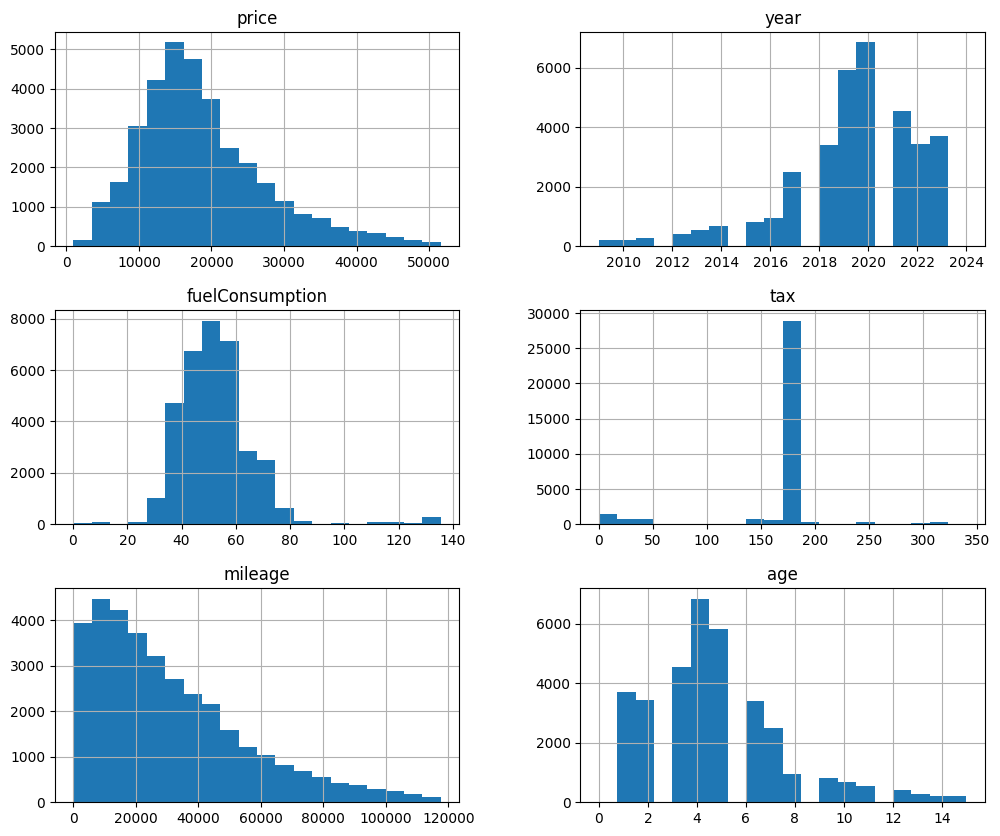

              price          year  fuelConsumption           tax  \
count  34422.000000  34422.000000     34422.000000  34422.000000   
mean   18722.241648   2019.320177        52.486834    164.966010   
std     8745.752770      2.741570        14.489729     49.374714   
min      950.000000   2009.000000         0.100000      0.000000   
25%    12795.000000   2018.000000        44.100000    170.000000   
50%    16999.000000   2020.000000        51.400000    180.000000   
75%    23090.000000   2021.000000        58.900000    180.000000   
max    51600.000000   2024.000000       135.500000    340.000000   

             mileage           age  
count   34422.000000  34338.000000  
mean    30975.120192      4.679073  
std     24313.262239      2.744879  
min         1.000000      0.000000  
25%     12000.000000      3.000000  
50%     25001.500000      4.000000  
75%     44000.000000      6.000000  
max    117581.000000     15.000000  

          price    year  fuelConsumption    tax  mile

In [17]:
# Histogramme für numerische Merkmale aufzeichnen
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Zusammenfassende Statistik anzeigen
print(df.describe())
print()

# Medianwert anzeigen
print(df[["price", "year", "fuelConsumption", "tax", "mileage"]].agg(['median']))

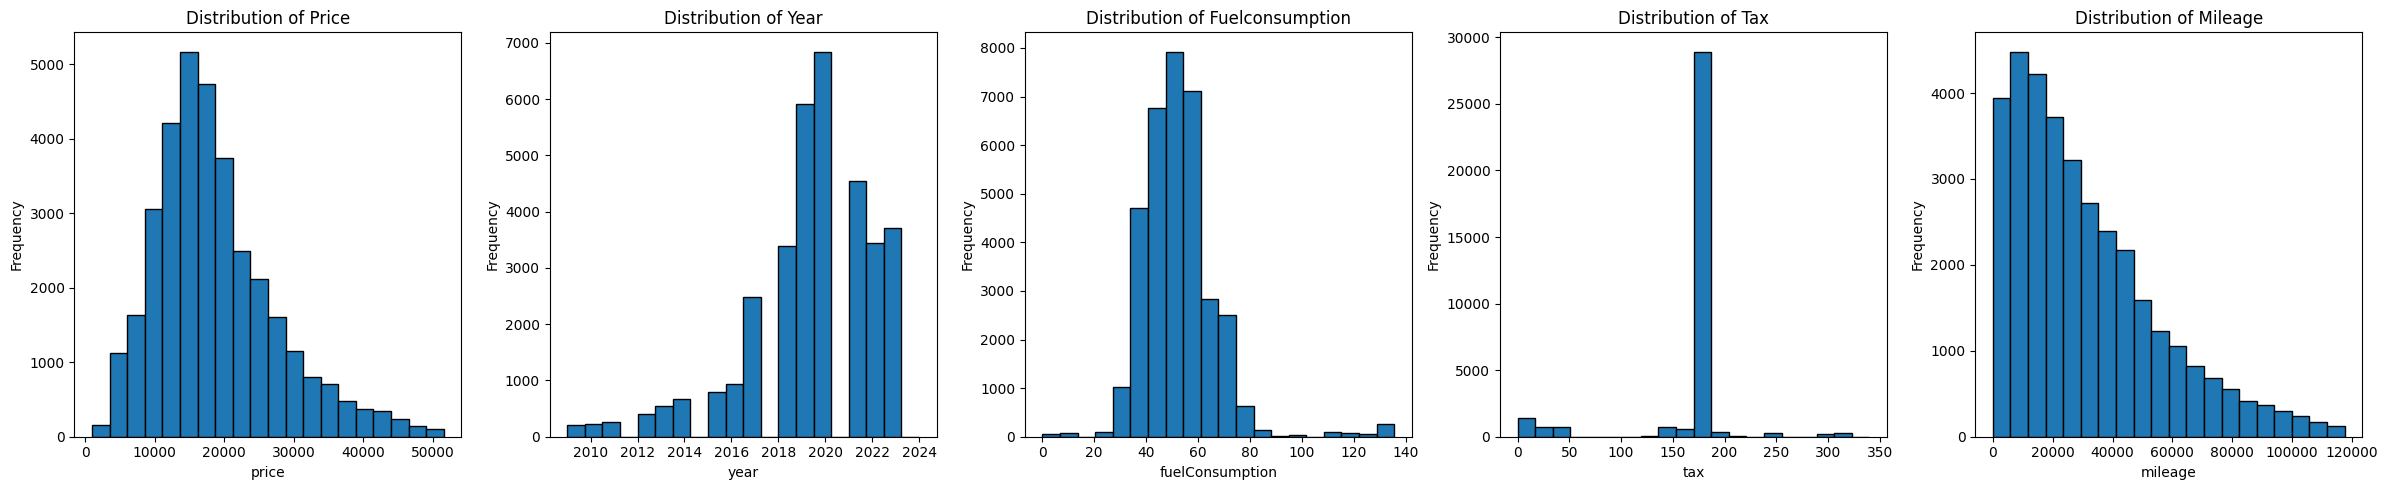

In [18]:
import matplotlib.pyplot as plt

# Numerische Spalten auswählen
numerical_columns = ["price", "year", "fuelConsumption", "tax", "mileage"]

# Subplots erstellen
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(24, 5))

# Histogramme aufzeichnen
for i, column in enumerate(numerical_columns):
    df[column].plot(kind="hist", bins=20, edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

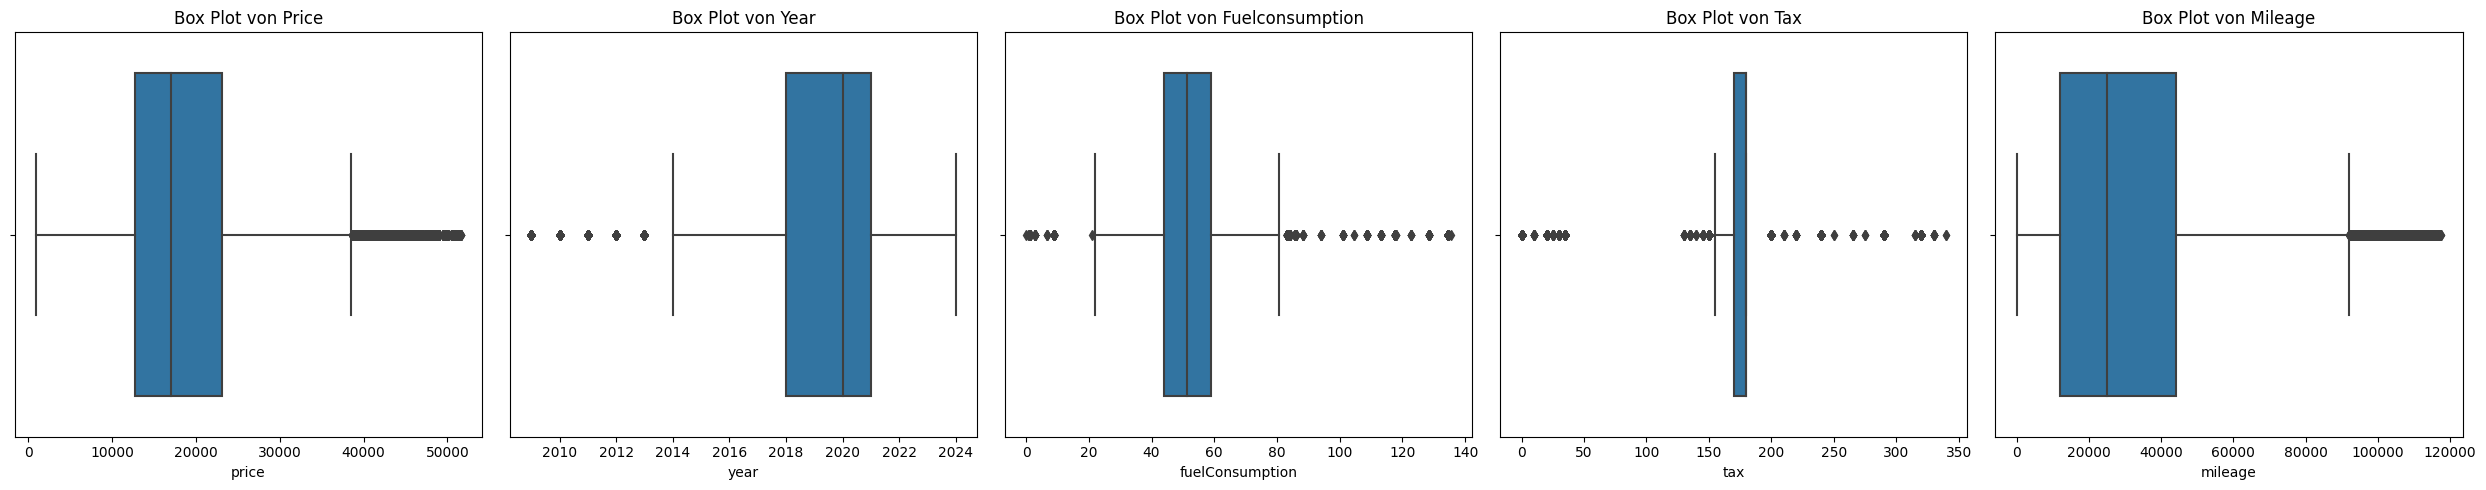

In [19]:
# Numerische Spalten auswählen
numerical_columns = ["price", "year", "fuelConsumption", "tax", "mileage"]

# Subplots erstellen
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(25, 5))

# Boxplots aufzeichnen
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot von {column.capitalize()}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

### Für kategorische Features

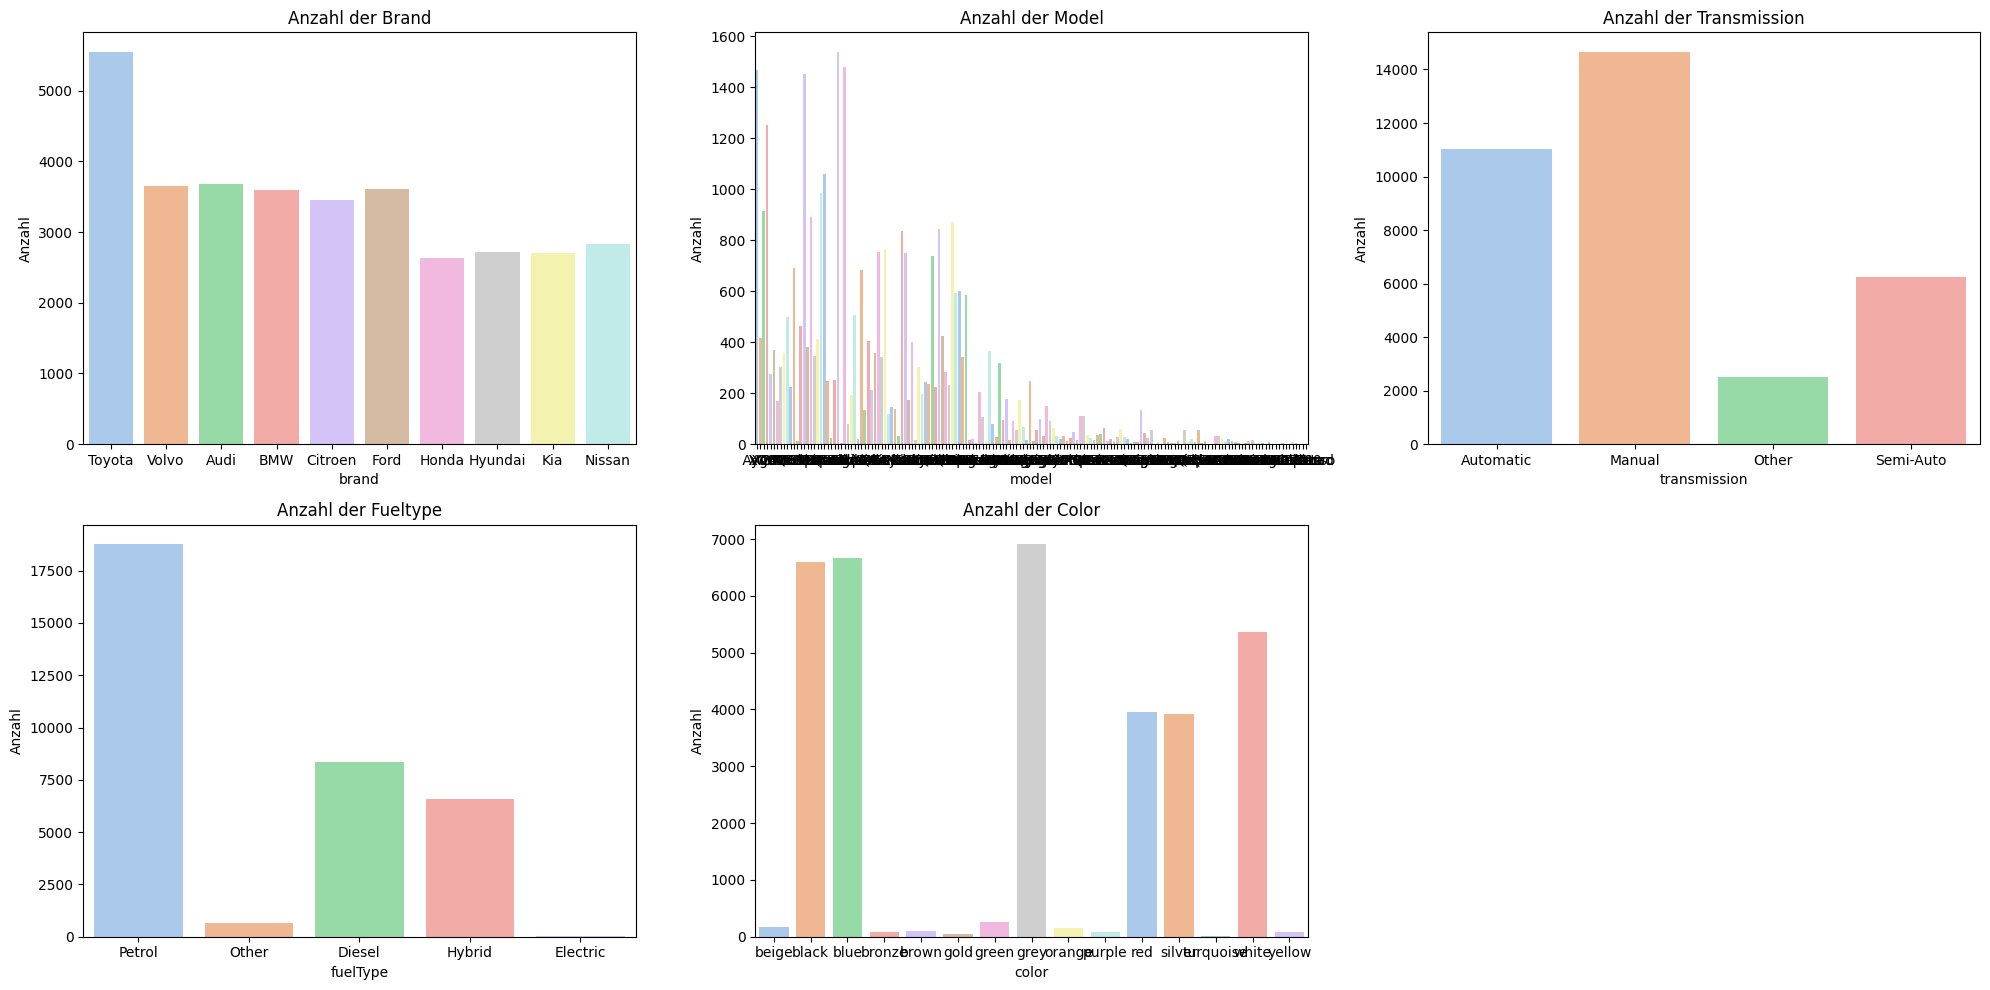

In [20]:
# Kategoriale Spalten auswählen
categorical_columns = ['brand', 'model', 'transmission', 'fuelType', 'color']

# Subplots erstellen
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Balkendiagramme zeichnen
for i, column in enumerate(categorical_columns):
    if i == 5:
        break
    sns.countplot(x=df[column], ax=axes[i], palette='pastel')
    axes[i].set_title(f'Anzahl der {column.capitalize()}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Anzahl')
    
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

### Für Beziehungen zwischen numerische Features

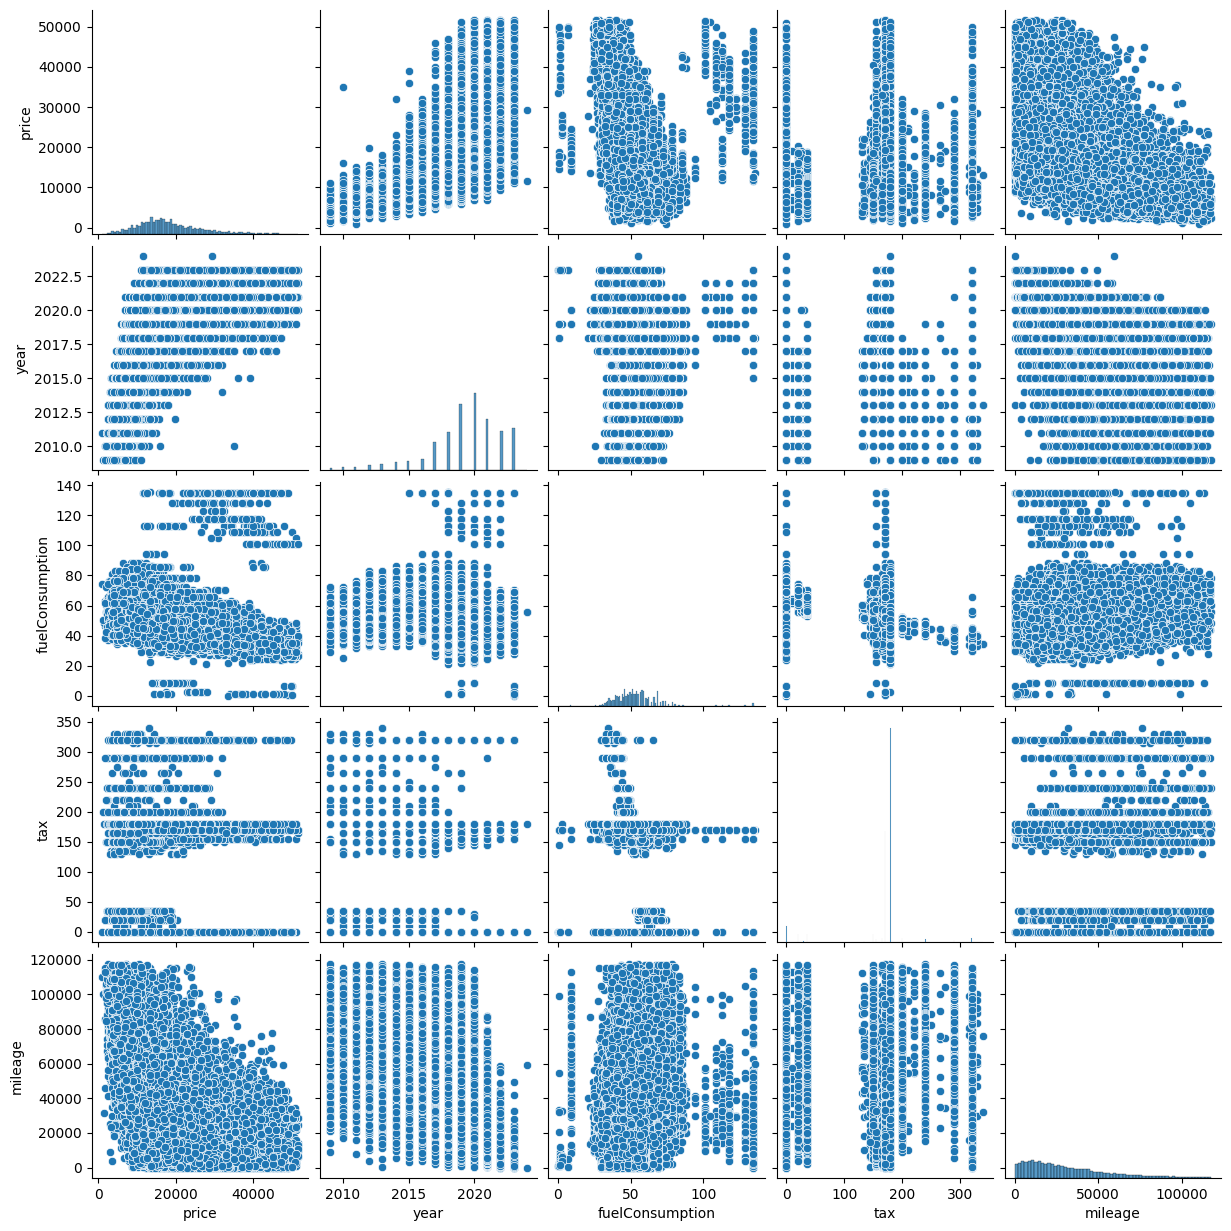

In [21]:
sns.pairplot(df[["price", "year", "fuelConsumption", "tax", "mileage"]])
plt.show()

#### Beispiele 

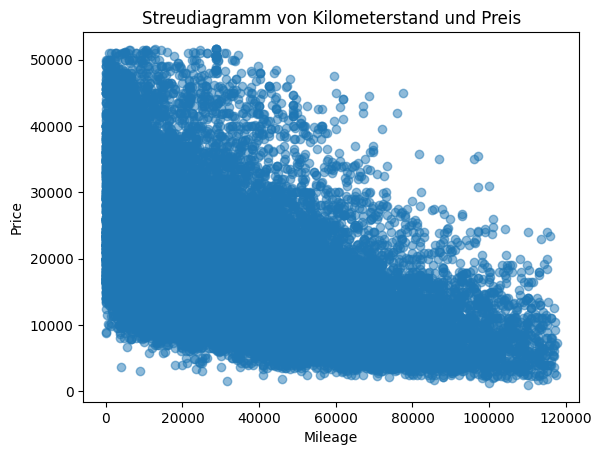

In [22]:
plt.scatter(x=df['mileage'], y=df['price'], alpha=0.5)
plt.title('Streudiagramm von Kilometerstand und Preis')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

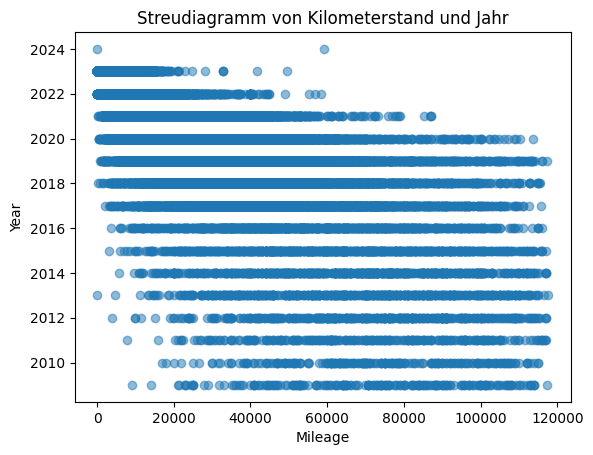

In [23]:
plt.scatter(x=df['mileage'], y=df['year'], alpha=0.5)
plt.title('Streudiagramm von Kilometerstand und Jahr')
plt.xlabel('Mileage')
plt.ylabel('Year')
plt.show()

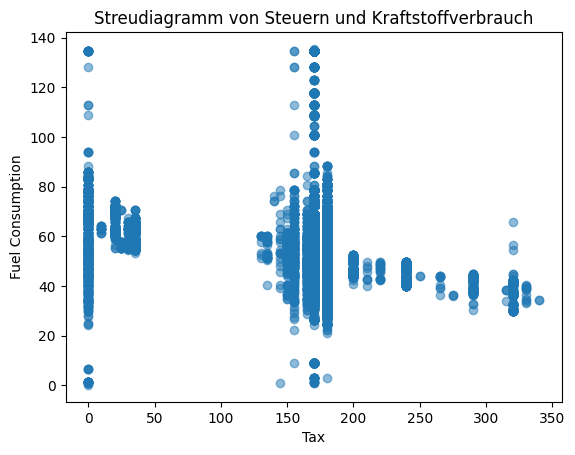

In [24]:
plt.scatter(x=df['tax'], y=df['fuelConsumption'], alpha=0.5)
plt.title('Streudiagramm von Steuern und Kraftstoffverbrauch')
plt.xlabel('Tax')
plt.ylabel('Fuel Consumption')
plt.show()

### Korrelationsanalyse mithilfe der Korrelationsmatrix für numerische Features

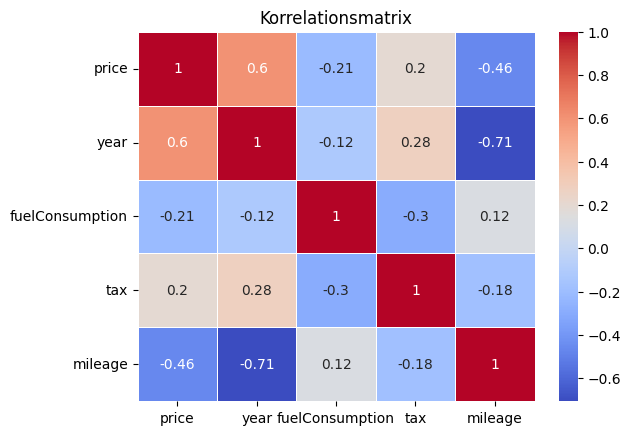

In [25]:
numerical_columns = ["price", "year", "fuelConsumption", "tax", "mileage"]

# Kategoriale Spalten löschen 
df_numerical = df[numerical_columns]

# Korrelationsmatrix berechnen und visualisieren 
correlation_matrix = df_numerical.corr()

# Heatmap erstellen
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korrelationsmatrix')
plt.show()

### Für Beziehungen zwischen kategorische Features

### Korrelationsanalyse mithilfe der Korrelationsmatrix für numerische Features

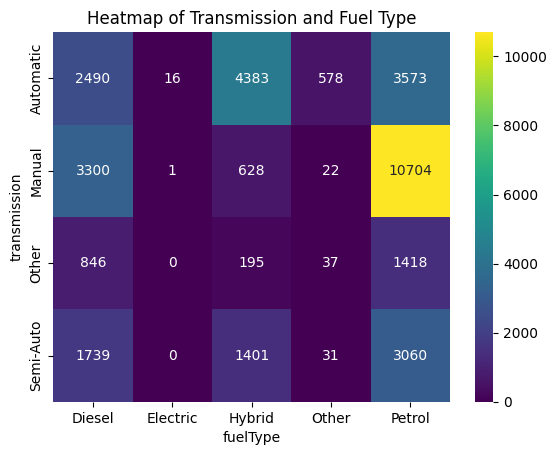

In [26]:
categorical_columns = ['brand', 'transmission', 'fuelType', 'color']

# Kreuztabellierung erstellen
cross_tab = pd.crosstab(df['transmission'], df['fuelType'])

# Heatmap erstellen
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Transmission and Fuel Type')
plt.show()

### Einzigartige Features für Einzigartige Muster und allgemeine Analyse

In [27]:
for column in df.columns:
    num_distinct_vales = len(df[column].unique())
    print(f'{column}: {num_distinct_vales} distinct values')

brand: 10 distinct values
model: 164 distinct values
price: 7826 distinct values
year: 17 distinct values
transmission: 4 distinct values
fuelConsumption: 161 distinct values
tax: 27 distinct values
mileage: 22483 distinct values
fuelType: 5 distinct values
color: 15 distinct values
variant: 12409 distinct values
age: 17 distinct values


## **Wahrscheinlichkeitsrechnung, Hypothesen und Schlussfolgerungen**

Formulieren Sie mindestens zwei Ereignisse.

* Was ist die Wahrscheinlichkeit für das Auftreten der Ereignisse?

* Was ist die Wahrscheinlichkeit für das Auftreten des ersten Ereignisses unter der Bedingung des Auftretens des zweiten Ereignisses?

* Was ist die Wahrscheinlichkeit für das Auftreten des zweiten Ereignisses unter der Bedingung des Auftretens des ersten Ereignisses?

**Ereignis A:** Das Auto ist rot.

**Ereignis B:** Die Marke des Autos ist 'Toyota'.

#### Wahrscheinlichkeit für Ereignis A
P(A) = Anzahl der roten Autos / Gesamtzahl der Autos

In [28]:
# Wahrscheinlichkeit für Ereignis A
anzahl_rote_autos = df[df['color'] == 'red'].shape[0]
print(anzahl_rote_autos)

anzahl_autos = df.shape[0]
print(anzahl_autos)

wahrscheinlichkeit_ereignis_a = anzahl_rote_autos / anzahl_autos

print("P(A) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_a, wahrscheinlichkeit_ereignis_a * 100))

3959
34422
P(A) ist 0.115014, Prozentsatz ist 11.501365%


#### Wahrscheinlichkeit für Ereignis B
P(B) = Anzahl der Autos mit der Marke 'Toyota' / Gesamtzahl der Autos

In [29]:
# Wahrscheinlichkeit für Ereignis B
anzahl_von_toyota = df[df['brand'] == 'Toyota'].shape[0]
print(anzahl_von_toyota)

anzahl_autos = df.shape[0]
print(anzahl_autos)

wahrscheinlichkeit_ereignis_b = anzahl_von_toyota / anzahl_autos

print("P(B) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_b, wahrscheinlichkeit_ereignis_b * 100))

5546
34422
P(B) ist 0.161118, Prozentsatz ist 16.111789%


#### Wahrscheinlichkeit für das Auftreten des Ereignisses A unter der Bedingung des Auftretens des Ereignisses B
P(A|B) = P(A ∩ B) / P(B)

P(A|B) = Anzahl der roten Autos mit der Marke 'Toyota' / Anzahl der Autos mit der Marke 'Toyota'



In [30]:
anzahl_von_roten_toyota = df[(df['color'] == 'red') & (df['brand'] == 'Toyota')].shape[0]
print(anzahl_von_roten_toyota)

anzahl_von_toyota = df[df['brand'] == 'Toyota'].shape[0]
print(anzahl_von_toyota)

wahrscheinlichkeit_ereignis_a_b = anzahl_von_roten_toyota / anzahl_von_toyota
print("P(A|B) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_a_b, wahrscheinlichkeit_ereignis_a_b * 100))



910
5546
P(A|B) ist 0.164082, Prozentsatz ist 16.408222%


#### Wahrscheinlichkeit für das Auftreten des Ereignisses B unter der Bedingung des Auftretens des Ereignisses A
P(B|A) = P(A ∩ B) / P(A)

P(B|A) = Anzahl der roten Autos mit der Marke 'Toyota' / Anzahl der roten Autos

In [31]:
anzahl_von_roten_toyota = df[(df['color'] == 'red') & (df['brand'] == 'Toyota')].shape[0]
print(anzahl_von_roten_toyota)

anzahl_rote_autos = df[df['color'] == 'red'].shape[0]
print(anzahl_rote_autos)

wahrscheinlichkeit_ereignis_b_a = anzahl_von_roten_toyota / anzahl_rote_autos
print("P(B|A) ist %f, Prozentsatz ist %f%%" % (wahrscheinlichkeit_ereignis_b_a, wahrscheinlichkeit_ereignis_b_a * 100))

910
3959
P(B|A) ist 0.229856, Prozentsatz ist 22.985602%


### **Prüfung von Bayes-Theorem**

 **Bayes-Theorem für P(A|B):**
 
  P(A|B) = P(B|A) * P(A) / P(B)

**Bayes-Theorem für P(B|A):**

 P(B|A) = P(A|B) * P(B) / P(A)

In [32]:
# das Bayes-Theorem überprüfen für P(A|B)
if wahrscheinlichkeit_ereignis_a_b == wahrscheinlichkeit_ereignis_b_a * wahrscheinlichkeit_ereignis_a / wahrscheinlichkeit_ereignis_b:
    print('Das Bayes-Theorem ist für P(A|B) bewiesen')
else:
    print('Das Bayes-Theorem ist NICHT bewiesen')

Das Bayes-Theorem ist für P(A|B) bewiesen


In [33]:
# das Bayes-Theorem überprüfen für P(B|Æ)
if wahrscheinlichkeit_ereignis_b_a == wahrscheinlichkeit_ereignis_a_b * wahrscheinlichkeit_ereignis_b / wahrscheinlichkeit_ereignis_a:
    print('Das Bayes-Theorem ist für P(B|A) bewiesen')
else:
    print('Das Bayes-Theorem ist NICHT bewiesen')

Das Bayes-Theorem ist für P(B|A) bewiesen


#### Hypothesen und Schlussfolgerungen
Formulieren Sie mindestens drei testbare Hypothesen auf der Grundlage Ihrer Datenuntersuchung.

* Was sind die Nullhypothesen und was sind die alternativen Hypothesen?**

* Welche Hypothesen lassen sich durch einen Hypothesentest verwerfen oder bestätigen?**

* Was sagen Signifikanzniveau und p-Wert über die Hypothesentests aus?**

* Welche Schlussfolgerungen lassen sich ableiten?**

* Wie aussagekräftig sind die Ergebnisse in welchen Grenzen?**

Mithilfe t-test und p-value könnten Null-Hypothese verwerfen oder bestätigen werden.

**Signifikanzniveau (α):** 
Das Signifikanzniveau ist die Wahrscheinlichkeit, mit der die Nullhypothese zurückgewiesen wird, wenn sie tatsächlich wahr ist.
Übliche Werte für α sind 0,05, 0,01 oder 0,10.
Es stellt den Schwellenwert für das akzeptable Risiko eines Fehlers vom Typ I (falsch positiv) dar.
Ein niedrigeres α bedeutet ein strengeres Kriterium für die Zurückweisung der Nullhypothese.

**P-Wert:**
Der p-Wert ist die Wahrscheinlichkeit, eine Teststatistik zu beobachten, die genauso extrem oder extremer ist als die in der Stichprobe beobachtete, unter der Annahme, dass die Nullhypothese wahr ist.
Wenn der p-Wert kleiner oder gleich α ist, liefert er den Beweis für die Ablehnung der Nullhypothese.
Ein kleiner p-Wert deutet darauf hin, dass es unwahrscheinlich ist, dass die beobachteten Daten auftreten, wenn die Nullhypothese wahr ist.
Ein größerer p-Wert deutet auf einen schwachen Beweis gegen die Nullhypothese hin.
Interpretation auf der Grundlage des p-Werts und des Signifikanzniveaus:

**p≤α:** Verwerfen Sie die Nullhypothese.

**p>α:** Die Nullhypothese kann nicht verworfen werden.

***1. Hypothese***
* **Nullhypothese:** Es gibt keinen Unterschied zwischen den Preisen von Fahrzeugen in Rot und anderen Farben.
* **Alternative Hypothese:** Rote Fahrzeuge sind billiger als andersfarbige Fahrzeuge.

***2. Hypothese***
* **Nullhypothese:** Es gibt keinen Preisunterschied zwischen Benzin- und Dieselfahrzeugen.
* **Alternative Hypothese:** Benzinfahrzeuge sind billiger als Dieselfahrzeuge.

***3. Hypothese***
* **Nullhypothese:** Die Steuer für Autos mit Automatikgetriebe ist gleich hoch wie die Steuer für Autos mit manuellem Getriebe.
* **Alternative Hypothese:** Die Steuer für Fahrzeuge mit Automatikgetriebe unterscheidet sich von der Steuer für Fahrzeuge mit manuellem Getriebe.

In [79]:
from scipy import stats
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),3000):
    df_shuffledx = df_shuffled[i:i+3000]
    red_cars = df_shuffledx[df_shuffledx['color'] == 'red']['price']

    other_cars = df_shuffledx[df_shuffledx['color'] != 'red']['price']
    t_stat, p_value = stats.ttest_ind(other_cars, red_cars)
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Durchschnittlicher P-Wert:",f'{average_p:.10f}')
print("Durchschnittlicher T-Test-Wert:",average_t)

print("Letzte Iteration P-Wert:",p_value)

Durchschnittlicher P-Wert: 0.0009251083
Durchschnittlicher T-Test-Wert: 4.501780540062044
Letzte Iteration P-Wert: 0.006419294808364309


In [80]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),3000):
    df_shuffledx = df_shuffled[i:i+3000]
    petrol_cars = df_shuffledx[df_shuffledx['fuelType'] == 'Petrol']['price']

    diesel_cars = df_shuffledx[df_shuffledx['fuelType'] == 'Diesel']['price']
    t_stat, p_value = stats.ttest_ind(diesel_cars, petrol_cars)
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Durchschnittlicher P-Wert:",f'{average_p:.10f}')
print("Durchschnittlicher T-Test-Wert:",average_t)

print("Letzte Iteration P-Wert:",p_value)

Durchschnittlicher P-Wert: 0.0010150022
Durchschnittlicher T-Test-Wert: 4.2009054162953126
Letzte Iteration P-Wert: 0.002980494529630013


In [81]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
p_values = []
t_tests = []
for i in range(0,len(df_shuffled),3000):
    df_shuffledx = df_shuffled[i:i+3000]
    manual_cars = df_shuffledx[df_shuffledx['transmission'] == 'Manual']['tax']

    automatic_cars = df_shuffledx[df_shuffledx['transmission'] == 'Automatic']['tax']
    t_stat, p_value = stats.ttest_ind(automatic_cars, manual_cars)
    p_values.append(f'{p_value:.10f}')
    t_tests.append(t_stat)

p_values= [float(i) for i in p_values]
average_p = sum(p_values) / len(p_values)
average_t = sum(t_tests) / len(t_tests)
print("Durchschnittlicher P-Wert:",f'{average_p:.10f}')
print("Durchschnittlicher T-Test-Wert:",average_t)

print("Letzte Iteration P-Wert:",p_value)

Durchschnittlicher P-Wert: 0.0076325074
Durchschnittlicher T-Test-Wert: 3.8679430980714624
Letzte Iteration P-Wert: 0.013263170236456663


* Als wir zum ersten Mal versuchten, den p-Wert für unseren Datensatz zu berechnen, erhielten wir extrem kleine Werte. Um also Ergebnisse zu erhalten, die irgendetwas bedeuten könnten, haben wir versucht, unsere Stichprobengröße zu verringern. Wir haben unseren Datensatz in 10 Teile aufgeteilt und die p-Werte für jeden Teil berechnet und dann den Durchschnitt aller Teile ermittelt.

### **Ergebnisse**

Signifikanznivau: 0.01

Hypothesen 1:
In diesem hypothese die Durchschnittlicher P-Werte sind 0.00092 und das ist weniger als unser signifikanznivau und die Werte von T-test ist 4.50, deswegen sagen wir dieses hypothese stimmt. 

Hypothesen 2:
In diesem hypothese die Durchscnittlicher P-Werte sind 0.0010 und das ist weniger als unser signifikanznivau und die Werte von T-test ist 4.20, deswegen sagen wir dieses hypothese stimmt.

Hypothesen 3:
In diesem hypothese die Durchschnittlicher P-Werte sind 0.0076 und das ist weniger als unser signifikanznivau und die Werte von T-test ist 3.86, deswegen sagen wir diese hypothese stimmt.

##  **Maschinelles Lernen**
Formulieren Sie mindestens einen Anwendungsfall für ML-Modelle auf dem Datensatz. Wählen Sie mindestens zwei Algorithmen

**Anwendungsfall:** In unserem Anwendungsfall geht es um eine Regressionsanalyse des Preiswertes. Wir haben den Preis als abhängige Variable (y-Wert - Zielvariable) und alle anderen relevanten Merkmale (außer Modell und Variante) als unabhängige Variablen (x-Werte - Merkmale) verwendet. Außerdem haben wir uns entschieden, das Merkmal "year" als kategorische Variable zu verwenden.

In [37]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

from sklearn.model_selection import train_test_split


In [38]:
df2 = df.copy()
list_str_obj_cols = df.columns[df2.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df2[str_obj_col] = df2[str_obj_col].astype("category")
df2['year'] = df2['year'].astype("category")
df2 = df2.drop(columns=['variant'])

In [39]:
df2['year'].replace(2019.0133581606217,2019, inplace=True)
df2['year'].value_counts()

2020.0    6847
2019.0    5914
2021.0    4550
2023.0    3706
2022.0    3450
2018.0    3393
2017.0    2490
2016.0     943
2015.0     802
2014.0     676
2013.0     545
2012.0     410
2011.0     270
2010.0     219
2009.0     205
2024.0       2
Name: year, dtype: int64

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34422 entries, 0 to 37146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   brand            34422 non-null  category
 1   model            34422 non-null  category
 2   price            34422 non-null  int64   
 3   year             34422 non-null  category
 4   transmission     34422 non-null  category
 5   fuelConsumption  34422 non-null  float64 
 6   tax              34422 non-null  float64 
 7   mileage          34422 non-null  float64 
 8   fuelType         34422 non-null  category
 9   color            34422 non-null  category
 10  age              34338 non-null  float64 
dtypes: category(6), float64(4), int64(1)
memory usage: 1.8 MB


In [41]:
df2.sort_values(by="price").tail(15)

,brand,model,price,year,transmission,fuelConsumption,tax,mileage,fuelType,color,age
18548,Volvo,XC90,51280,2021.0,Semi-Auto,100.9,170.0,10399.0,Hybrid,grey,3.0
8672,Volvo,XC60,51370,2023.0,Semi-Auto,35.8,170.0,10497.0,Hybrid,blue,1.0
2558,Volvo,XC60,51370,2023.0,Semi-Auto,35.8,170.0,6119.0,Hybrid,black,1.0
28529,Audi,A8,51400,2022.0,Semi-Auto,38.7,165.0,10439.0,Diesel,silver,2.0
27386,Volvo,XC90,51490,2022.0,Semi-Auto,100.9,170.0,9674.0,Hybrid,silver,2.0
5563,BMW,X6,51490,2022.0,Automatic,38.7,170.0,14309.0,Diesel,black,2.0
7202,BMW,X5,51500,2022.0,Semi-Auto,28.0,170.0,12723.0,Hybrid,black,2.0
31227,Volvo,XC90,51500,2023.0,Semi-Auto,39.8,170.0,6400.0,Diesel,silver,1.0
9523,BMW,X5,51500,2021.0,Automatic,34.9,170.0,24600.0,Hybrid,blue,3.0
28144,Volvo,XC90,51540,2023.0,Semi-Auto,39.8,170.0,12938.0,Diesel,silver,1.0


In [42]:
from scipy.stats import boxcox

df_box = df2.copy()
df_sqrt = df2.copy()
df_log = df2.copy()
df_lin = df2.copy()
df_box["price"], _  = boxcox(df_box["price"])
df_sqrt["price"]    = np.sqrt(df_sqrt["price"])
df_log["price"]     = np.log(df_log["price"])
df_lin["price"]     = df_lin["price"] / 10000

In [43]:
numerical_col = ['price', 'fuelConsumption', 'tax', 'mileage', 'age']

### **Lineare Regression**
**Aufgabe:** Vorhersage einer numerischen Zielvariablen (in unserem Fall, Preis).

**Vorteile:** Einfach, interpretierbar und effizient.

**Nachteile:** Nimmt eine lineare Beziehung zwischen Merkmalen und Zielgröße an.

#### **Die Entscheidung durch Testen, welche Normalisierungsmethode die beste ist**
* BOXCOX Transformation
* Quadratwurzel-Transformation 
* Logarithmische Transformation
* Normalisierung durch Teilung durch einen konstanten Faktor - einfacher linearer Ansat

**Die Ergebnisse der logarithmischen Transformation sind die besten.**


In [44]:
df_box = df_box.sample(frac=1, random_state=42).reset_index(drop=True)
df_box.dropna(subset=['age'], inplace=True)
X_box = df_box.drop(["price"], axis=1)
Y_box = df_box["price"]


df_sqrt = df_sqrt.sample(frac=1, random_state=42).reset_index(drop=True)
df_sqrt.dropna(subset=['age'], inplace=True)
X_sqrt = df_sqrt.drop(["price"], axis=1)
Y_sqrt = df_sqrt["price"]

df_log = df_log.sample(frac=1, random_state=42).reset_index(drop=True)
df_log.dropna(subset=['age'], inplace=True)
X_log = df_log.drop(["price"], axis=1)
Y_log = df_log["price"]

df_lin = df_lin.sample(frac=1, random_state=42).reset_index(drop=True)
df_lin.dropna(subset=['age'], inplace=True)
X_lin = df_lin.drop(["price"], axis=1)
Y_lin = df_lin["price"]

In [45]:
X_box = pd.get_dummies(X_box, columns=X_box.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X_box.shape)

X_sqrt = pd.get_dummies(X_sqrt, columns=X_sqrt.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X_sqrt.shape)

X_log = pd.get_dummies(X_log, columns=X_log.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X_log.shape)

X_lin = pd.get_dummies(X_lin, columns=X_lin.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X_lin.shape)

(34338, 212)
(34338, 212)
(34338, 212)
(34338, 212)


In [46]:
X_train_box, X_test_box, y_train_box, y_test_box = train_test_split(X_box,Y_box,test_size=0.25, random_state=42)
print("Number of rows in train data =", X_train_box.shape[0])
print("Number of rows in test data =", X_test_box.shape[0])

X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt,Y_sqrt,test_size=0.25, random_state=42)
print("Number of rows in train data =", X_train_sqrt.shape[0])
print("Number of rows in test data =", X_test_sqrt.shape[0])

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log,Y_log,test_size=0.25, random_state=42)
print("Number of rows in train data =", X_train_log.shape[0])
print("Number of rows in test data =", X_test_log.shape[0])

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin,Y_lin,test_size=0.25, random_state=42)
print("Number of rows in train data =", X_train_lin.shape[0])
print("Number of rows in test data =", X_test_lin.shape[0])

Number of rows in train data = 25753
Number of rows in test data = 8585
Number of rows in train data = 25753
Number of rows in test data = 8585
Number of rows in train data = 25753
Number of rows in test data = 8585
Number of rows in train data = 25753
Number of rows in test data = 8585


In [47]:
from sklearn.linear_model import LinearRegression

linearregression_box = LinearRegression()
linearregression_box.fit(X_train_box, y_train_box)

from sklearn.linear_model import LinearRegression

linearregression_sqrt = LinearRegression()
linearregression_sqrt.fit(X_train_sqrt, y_train_sqrt)

from sklearn.linear_model import LinearRegression

linearregression_log = LinearRegression()
linearregression_log.fit(X_train_log, y_train_log)

from sklearn.linear_model import LinearRegression

linearregression_lin = LinearRegression()
linearregression_lin.fit(X_train_lin, y_train_lin)

LinearRegression()

In [48]:
# Funktion zur Berechnung von MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Funktion zur Berechnung des adjusted R-Quadrats
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Funktion zur Berechnung verschiedener Metriken zur Prüfung der Leistung eines Regressionsmodells
def model_performance_regression(model, predictors, target):

    # Vorhersage anhand der unabhängigen Variablen
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # Berechnung des adjusted R-Quadrats
    rmse = np.sqrt(mean_squared_error(target, pred))  # Berechnung von RMSE
    mae = mean_absolute_error(target, pred)  # Berechnung von MAE
    mape = mape_score(target, pred)  # Berechnung von MAPE

    # Erstellung eines Dataframes mit Metriken
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [49]:
print("Trainingsleistung mit BOXCOX Transformation\n")
linearregression_train_perf_box = model_performance_regression(linearregression_box, X_train_box, y_train_box)
print(linearregression_train_perf_box, "\n")

print("Trainingsleistung mit SQRT Transformation\n")
linearregression_train_perf_sqrt = model_performance_regression(linearregression_sqrt, X_train_sqrt, y_train_sqrt)
print(linearregression_train_perf_sqrt, "\n")

print("Trainingsleistung mit logarithmische Transformation\n")
linearregression_train_perf_log = model_performance_regression(linearregression_log, X_train_log, y_train_log)
print(linearregression_train_perf_log, "\n")

print("Trainingsleistung bei Skalierung mit konstantem Faktor\n")
linearregression_train_perf_lin = model_performance_regression(linearregression_lin, X_train_lin, y_train_lin)
print(linearregression_train_perf_lin, "\n")

Trainingsleistung mit BOXCOX Transformation

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  2.790788  2.111182    0.93289        0.932333  3.153169 

Trainingsleistung mit SQRT Transformation

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  8.550937  6.405696   0.926161        0.925548  4.904577 

Trainingsleistung mit logarithmische Transformation

      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.12209  0.092883   0.938824        0.938316  0.959411 

Trainingsleistung bei Skalierung mit konstantem Faktor

       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.280526  0.202819   0.898121        0.897275  12.397182 



In [50]:
print("Test Leistung mit BOXCOX Transformation\n")
linearregression_test_perf_box = model_performance_regression(
    linearregression_box, X_test_box, y_test_box
)
print(linearregression_test_perf_box, "\n")

print("Test Leistung mit SQRT Transformation\n")
linearregression_test_perf_sqrt = model_performance_regression(
    linearregression_sqrt, X_test_sqrt, y_test_sqrt
)
print(linearregression_test_perf_sqrt, "\n")

print("Test Leistung mit logarithmische Transformation\n")
linearregression_test_perf_log = model_performance_regression(
    linearregression_log, X_test_log, y_test_log
)
print(linearregression_test_perf_log, "\n")

print("Test Leistung bei Skalierung mit konstantem Faktor\n")
linearregression_test_perf_lin = model_performance_regression(
    linearregression_lin, X_test_lin, y_test_lin
)
print(linearregression_test_perf_lin, "\n")

Test Leistung mit BOXCOX Transformation

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  2.828538  2.169546   0.928943        0.927143  3.239993 

Test Leistung mit SQRT Transformation

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  8.625314  6.564706    0.92252        0.920558  5.025347 

Test Leistung mit logarithmische Transformation

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.125355  0.095401   0.933486        0.931801  0.984991 

Test Leistung bei Skalierung mit konstantem Faktor

       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.280593  0.206153   0.894297         0.89162  12.552519 



### **Neuronale Netze (MLP - Multi-Layer Perceptron)**
**Aufgabe:** Wird für die Regression verwendet

**Vorteile:** Kann komplexe Beziehungen lernen, leistungsstark bei großen Datensätzen.

**Nachteile:** Erfordert mehr Daten, ist rechenintensiv und kann schwierig zu interpretieren sein.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Load your data here (replace with the path to your dataset)
df2 = df2.dropna()
data = df2.copy()
# ['brand', 'model', 'price', 'year', 'transmission', 'fuelConsumption', 'tax', 'mileage', 'fuelType', 'color', 'age']

# Preprocess the data
# Replace 'categorical_columns' with the list of your categorical columns
categorical_features = ['brand','model','transmission','color','fuelType']
numerical_features = ['year','tax','fuelConsumption','age']

# Split the data into features and target
X = data.drop(columns=['price' ], axis=1)
y = data['price']
y = np.sqrt(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Erstellung des MLP Regressors
mlp = MLPRegressor(hidden_layer_sizes=(100,20), activation='relu', solver='adam', max_iter=2000)

# Erstellen einer Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', mlp)])

# Das Modell trainieren
pipeline.fit(X_train, y_train)

# Bewertung des Modells
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Preise vorhersagen (Verwendungsbeispiel)
predicted_price = pipeline.predict(X_test.head(1))
print(f"Predicted Price: {predicted_price[0]}")


Mean Squared Error: 67.13068267279856
Predicted Price: 145.46489384387084


In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation des Modells
y_pred = pipeline.predict(X_test)

# Kalkulierung von 'Mean Squared Error'
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Kalkulierung von 'R^2 score'
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 67.13068267279856
R^2 Score: 0.9312553298386542


### **Entscheidungsbäume**
**Aufgabe:** Wird für die Regression verwendet

**Vorteile:** Nichtlineare Beziehungen, gute Handhabung numerischer und kategorischer Merkmale, interpretierbar.

**Nachteile:** Kann bei schlechter Anpassung zu stark angepasst (overfit) werden.

In [53]:
# Entscheidungsbäume ohne Hyperparametrisierung

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

X = df2.copy()
X = df2.drop(columns=['price'])

# Datensatz in Features und Zielvariable aufteilen
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
y = df2['price']

# Aufteilung des Datensatzes in Trainingsmenge und Testmenge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entscheidungsbaum-Regressor-Objekt erstellen
regressor = DecisionTreeRegressor(random_state=42)

# das Regressor an die Trainingsdaten anpassen
regressor.fit(X_train, y_train)

# Vorhersage der Antwort für den Testdatensatz
y_pred = regressor.predict(X_test)

# Modellbewertung für Regression
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = metrics.r2_score(y_test, y_pred)

# Kalkulierung von adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Drucken der Metriken
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

Mean Absolute Error: 1762.9842687349967
Mean Squared Error: 7228305.512041024
Root Mean Squared Error: 2688.550820059205
R-squared: 0.9048237622645774
Adjusted R-squared: 0.9028238254621282


In [54]:
# Entscheidungsbäume mit Hyperparametrisierung
# Durch Optimierung der Parameter und Fine-tuning konnten wir die Accuracy score von 90,48 % auf 91,42 % steigern :)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
import pandas as pd

X = df2.copy()
X = df2.drop(columns=['price'])

# Datensatz in Features und Zielvariable aufteilen
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
y = df2['price']

# Aufteilung des Datensatzes in Trainingsmenge und Testmenge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entscheidungsbaum-Regressor-Objekt erstellen
regressor = DecisionTreeRegressor(random_state=42)

# Definition der Hyperparameter und ihrer möglichen Werte
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV-Objekt erstellen - Wir verwenden GridSearchCV, um das Modell mit optimale Parameter zu finden
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# das Modell an die Trainingsdaten anpassen
grid_search.fit(X_train, y_train)

# Drucken der besten gefundenen Hyperparameter
print("Best Hyperparameters:", grid_search.best_params_)

# Vorhersage der Antwort für den Testdatensatz unter Verwendung des besten Modells
y_pred = grid_search.best_estimator_.predict(X_test)

# Modellbewertung für Regression
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = metrics.r2_score(y_test, y_pred)

# Modellbewertung für Regression
n = len(X_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Drucken der Metriken
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Absolute Error: 1683.5871246592858
Mean Squared Error: 6511538.971025455
Root Mean Squared Error: 2551.77173176314
R-squared: 0.9142615402603821
Adjusted R-squared: 0.9124599193400927
